<div style="display: flex; background-color: RGB(255,114,0);" >
    <h1 style="margin: auto; padding: 30px;">ANALYSE DU BRIEF</h1>
</div>

C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\2596564232.py:10: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(r'C:\JN\Projet_9_Analyse_Ventes_Librairie\Transactions.csv', delimiter=';')


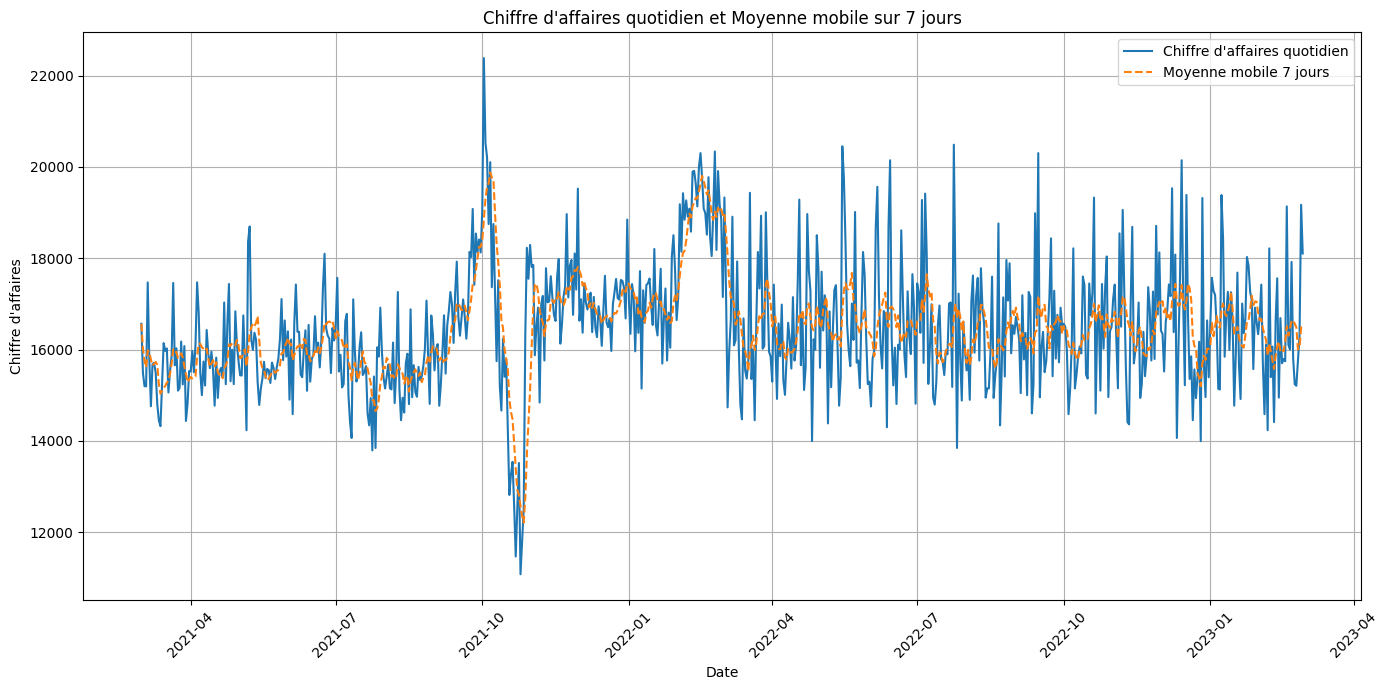

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

# Lecture des fichiers CSV avec le bon délimiteur
customers = pd.read_csv(r'C:\JN\Projet_9_Analyse_Ventes_Librairie\customers.csv', delimiter=';')
products = pd.read_csv(r'C:\JN\Projet_9_Analyse_Ventes_Librairie\products.csv', delimiter=';')
transactions = pd.read_csv(r'C:\JN\Projet_9_Analyse_Ventes_Librairie\Transactions.csv', delimiter=';')

# Convertir la colonne 'date' en format datetime
transactions['date'] = pd.to_datetime(transactions['date'])

# Fusion des données pour obtenir le chiffre d'affaires
data = transactions.merge(products, on='id_prod')
data['chiffre_affaires'] = data['price']  # Chaque transaction pour un produit

# Calcul du chiffre d’affaires total par date
chiffre_affaires_jour = data.groupby(data['date'].dt.date)['chiffre_affaires'].sum().reset_index()

# Calcul de la moyenne mobile (période choisie : 7 jours)
chiffre_affaires_jour['moyenne_mobile'] = chiffre_affaires_jour['chiffre_affaires'].rolling(window=7, min_periods=1).mean()

# Création du graphique
plt.figure(figsize=(14, 7))  # Taille du graphique
plt.plot(chiffre_affaires_jour['date'], chiffre_affaires_jour['chiffre_affaires'], label='Chiffre d\'affaires quotidien')
plt.plot(chiffre_affaires_jour['date'], chiffre_affaires_jour['moyenne_mobile'], label='Moyenne mobile 7 jours', linestyle='--')
plt.title('Chiffre d\'affaires quotidien et Moyenne mobile sur 7 jours')  # Titre du graphique
plt.xlabel('Date')  # Étiquette de l'axe des x
plt.ylabel('Chiffre d\'affaires')  # Étiquette de l'axe des y
plt.legend()  # Ajouter une légende
plt.grid(True)  # Ajouter une grille
plt.xticks(rotation=45)  # Rotation des étiquettes de date pour une meilleure lisibilité
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

       id_prod                       date session_id client_id
195881  0_1145 2021-10-01 00:00:23.722317    s_98170    c_5907
195882   1_622 2021-10-01 00:03:07.095422    s_98169    c_7614
195883   1_202 2021-10-01 00:03:16.664480    s_98171    c_4492
195884   1_288 2021-10-01 00:03:30.782117    s_98171    c_4492
195885   1_488 2021-10-01 00:03:38.968413    s_98171    c_4492


C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\3445914696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_octobre['day'] = df_octobre['date'].dt.day


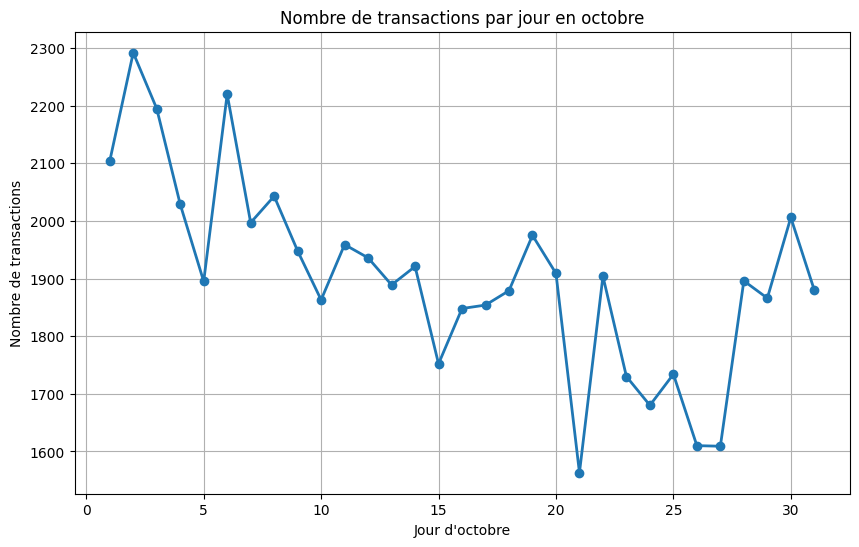

In [33]:
# Filtrer les transactions pour le mois d'octobre
df_octobre = transactions[transactions['date'].dt.month == 10]

# Affichage des 10 premières lignes pour vérifier le résultat
print(df_octobre.head())

# Compter le nombre de transactions par jour en octobre
df_octobre['day'] = df_octobre['date'].dt.day
transactions_per_day = df_octobre['day'].value_counts().sort_index()

# Créer un graphique pour le nombre de transactions par jour en octobre
plt.figure(figsize=(10, 6))
plt.plot(transactions_per_day.index, transactions_per_day.values, marker='o', linestyle='-', linewidth=2)
plt.title('Nombre de transactions par jour en octobre')
plt.xlabel('Jour d\'octobre')
plt.ylabel('Nombre de transactions')
plt.grid(True)
plt.show()
plt.show()

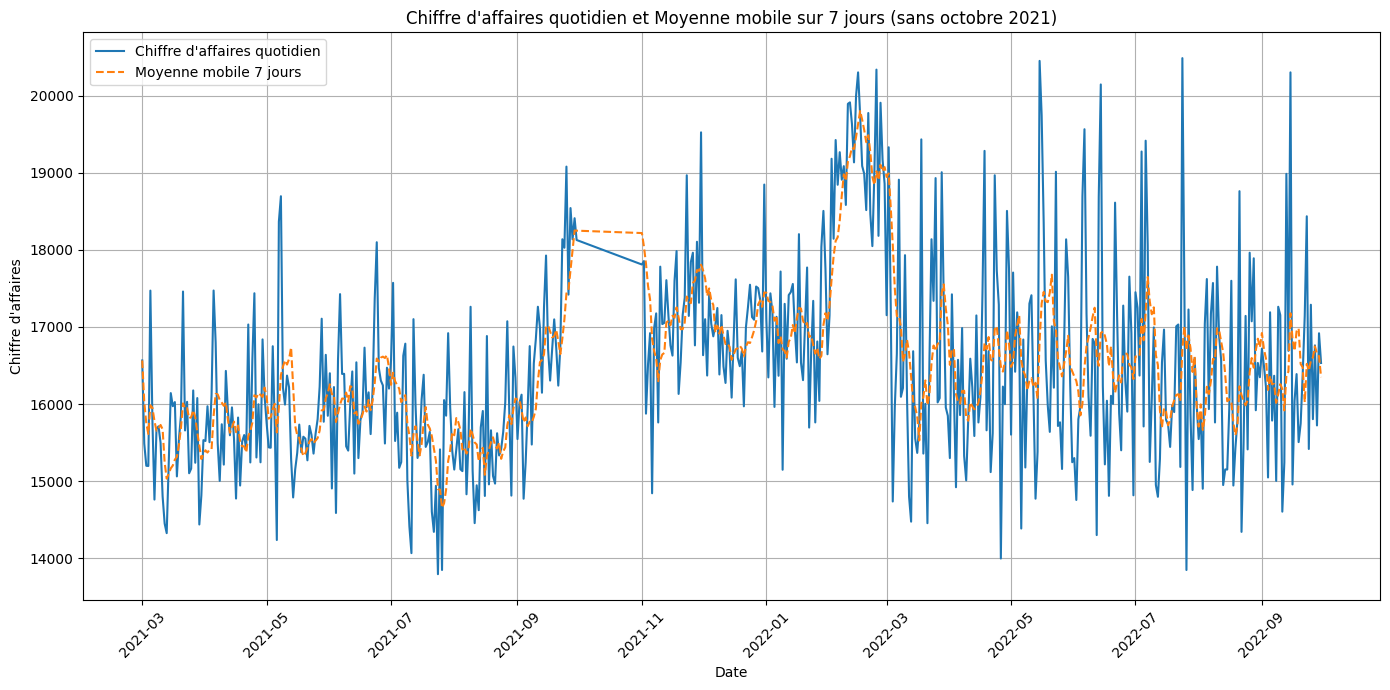

In [34]:
# Filtrer les transactions pour exclure le mois d'octobre 2021 et arrêter l'analyse avant octobre 2022
transactions = transactions[(~((transactions['date'].dt.month == 10) & (transactions['date'].dt.year == 2021))) & 
                            (transactions['date'] < '2022-10-01')]

# Fusion des données pour obtenir le chiffre d'affaires
data = transactions.merge(products, on='id_prod')
data['chiffre_affaires'] = data['price']  # Chaque transaction pour un produit

# Calcul du chiffre d’affaires total par date
chiffre_affaires_jour = data.groupby(data['date'].dt.date)['chiffre_affaires'].sum().reset_index()

# Calcul de la moyenne mobile (période choisie : 7 jours)
chiffre_affaires_jour['moyenne_mobile'] = chiffre_affaires_jour['chiffre_affaires'].rolling(window=7, min_periods=1).mean()

# Création du graphique
plt.figure(figsize=(14, 7))  # Taille du graphique
plt.plot(chiffre_affaires_jour['date'], chiffre_affaires_jour['chiffre_affaires'], label='Chiffre d\'affaires quotidien')
plt.plot(chiffre_affaires_jour['date'], chiffre_affaires_jour['moyenne_mobile'], label='Moyenne mobile 7 jours', linestyle='--')
plt.title('Chiffre d\'affaires quotidien et Moyenne mobile sur 7 jours (sans octobre 2021)')  # Titre du graphique
plt.xlabel('Date')  # Étiquette de l'axe des x
plt.ylabel('Chiffre d\'affaires')  # Étiquette de l'axe des y
plt.legend()  # Ajouter une légende
plt.grid(True)  # Ajouter une grille
plt.xticks(rotation=45)  # Rotation des étiquettes de date pour une meilleure lisibilité
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

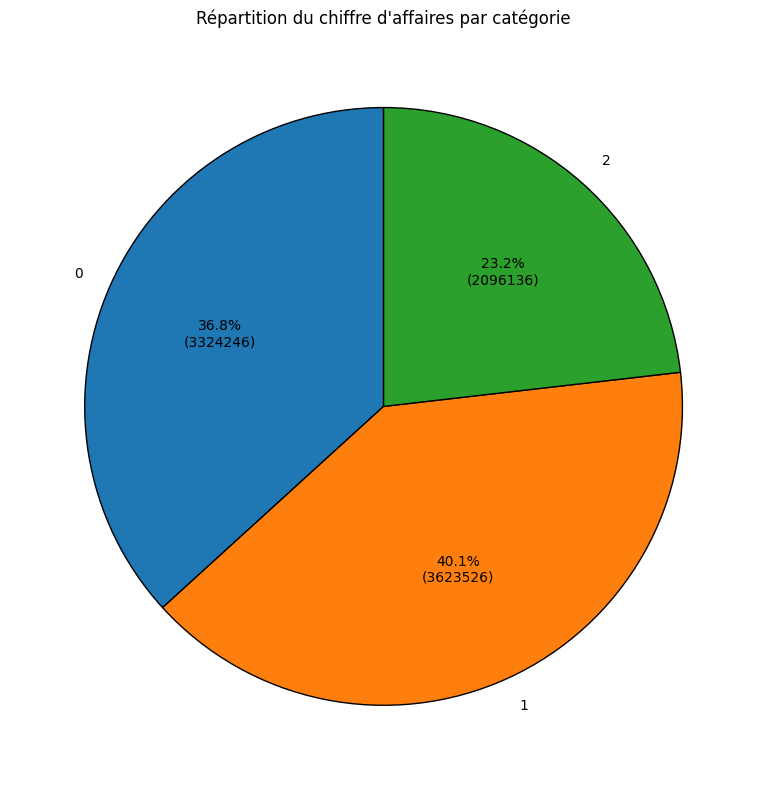

In [35]:
# Calcul du chiffre d’affaires total par catégorie
chiffre_affaires_categorie = data.groupby('categ')['chiffre_affaires'].sum().reset_index()

# Fonction pour afficher le CA et le pourcentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Création du graphique en camembert pour le chiffre d'affaires par catégorie
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.pie(
    chiffre_affaires_categorie['chiffre_affaires'], 
    labels=chiffre_affaires_categorie['categ'], 
    autopct=autopct_format(chiffre_affaires_categorie['chiffre_affaires']),
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Répartition du chiffre d\'affaires par catégorie')  # Titre du graphique
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique


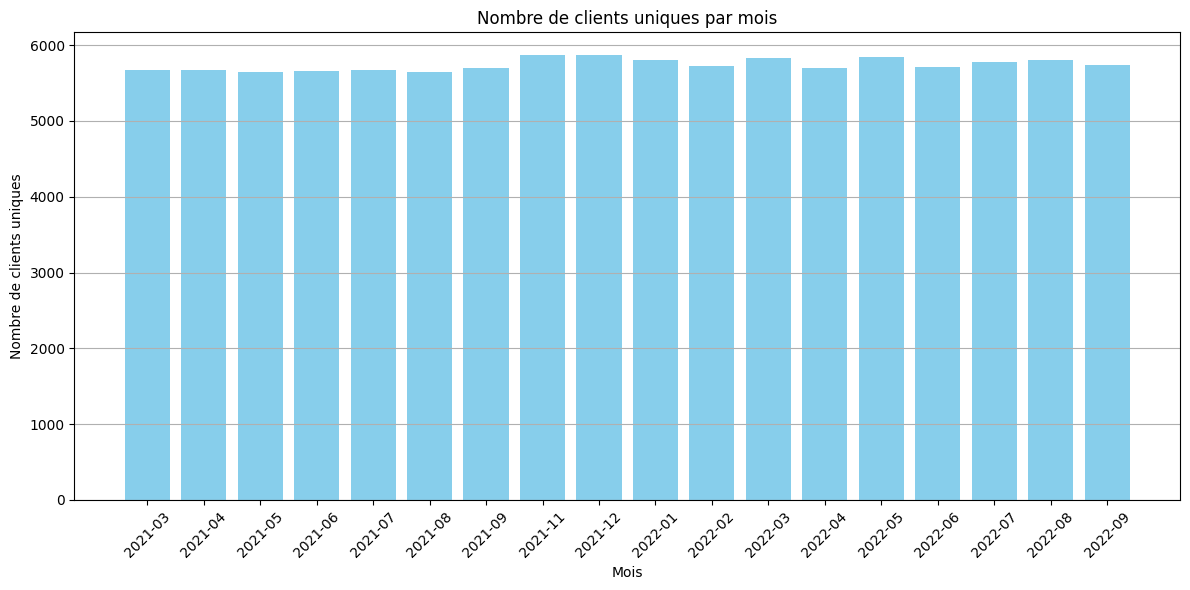

In [36]:
# Extraire l'année et le mois de la date pour faciliter le groupement
transactions['year_month'] = transactions['date'].dt.to_period('M')

# Calculer le nombre de clients uniques par mois
clients_per_month = transactions.groupby('year_month')['client_id'].nunique().reset_index()

# Renommer les colonnes pour une meilleure compréhension
clients_per_month.columns = ['Month', 'Unique Clients']

# Création du graphique à barres pour le nombre de clients uniques par mois
plt.figure(figsize=(12, 6))  # Taille du graphique
plt.bar(clients_per_month['Month'].astype(str), clients_per_month['Unique Clients'], color='skyblue')
plt.title('Nombre de clients uniques par mois')  # Titre du graphique
plt.xlabel('Mois')  # Étiquette de l'axe des x
plt.ylabel('Nombre de clients uniques')  # Étiquette de l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes de mois pour une meilleure lisibilité
plt.grid(axis='y')  # Ajouter une grille horizontale
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

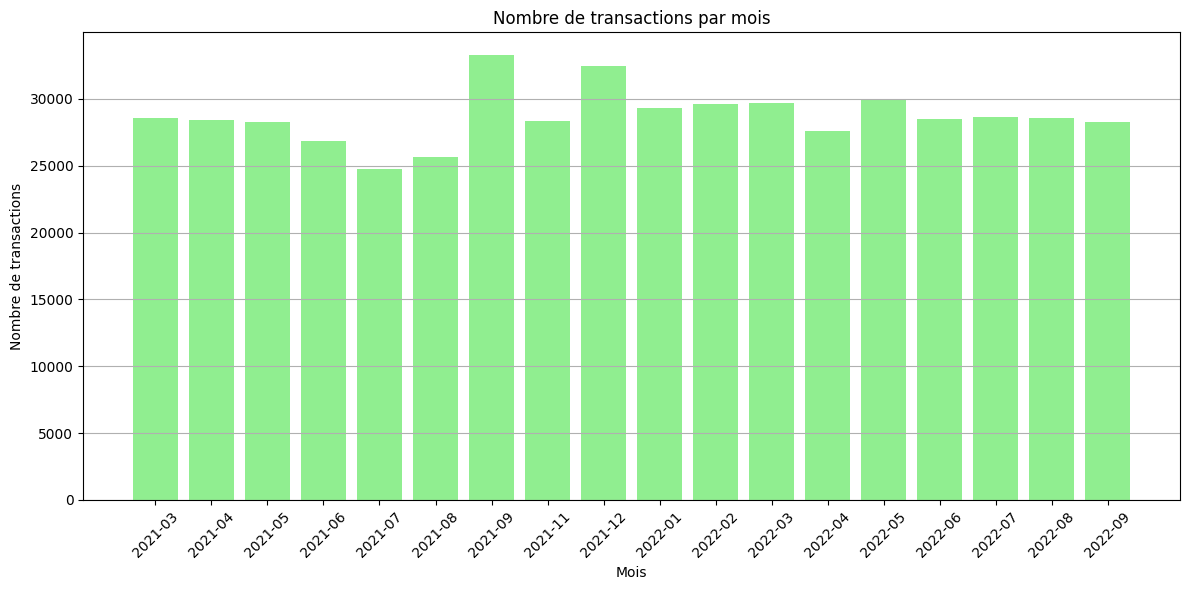

In [37]:
# Extraire l'année et le mois de la date pour faciliter le groupement
transactions['year_month'] = transactions['date'].dt.to_period('M')

# Calculer le nombre de transactions par mois
transactions_per_month = transactions.groupby('year_month').size().reset_index(name='Number of Transactions')

# Création du graphique à barres pour le nombre de transactions par mois
plt.figure(figsize=(12, 6))  # Taille du graphique
plt.bar(transactions_per_month['year_month'].astype(str), transactions_per_month['Number of Transactions'], color='lightgreen')
plt.title('Nombre de transactions par mois')  # Titre du graphique
plt.xlabel('Mois')  # Étiquette de l'axe des x
plt.ylabel('Nombre de transactions')  # Étiquette de l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes de mois pour une meilleure lisibilité
plt.grid(axis='y')  # Ajouter une grille horizontale
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

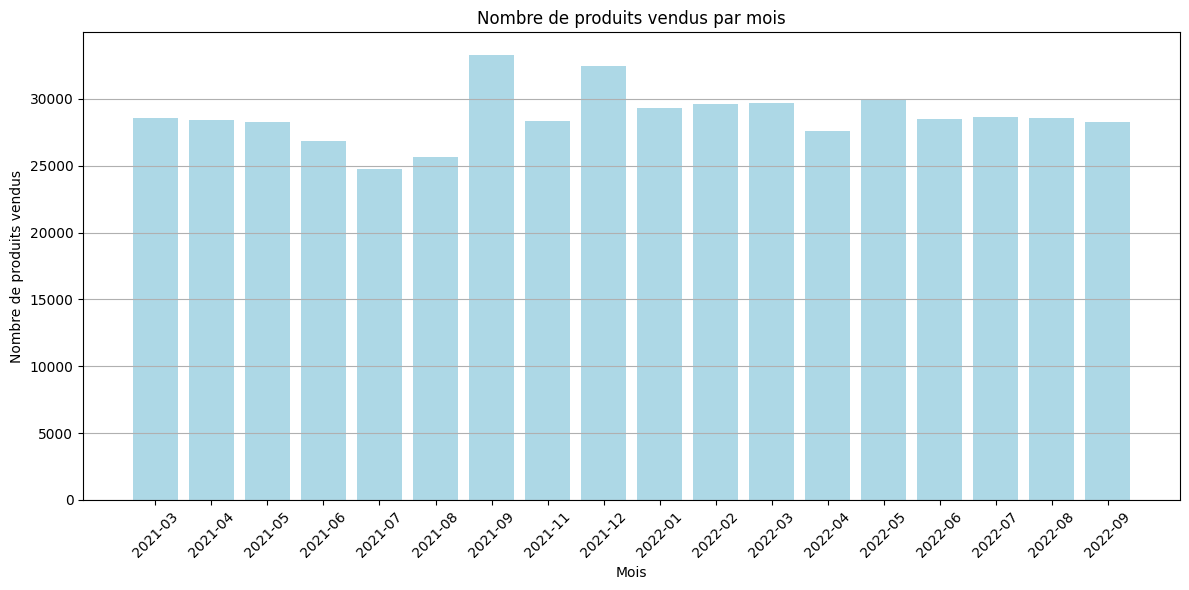

In [38]:
# Extraire l'année et le mois de la date pour faciliter le groupement
transactions['year_month'] = transactions['date'].dt.to_period('M')

# Si chaque ligne représente la vente d'un produit, comptez simplement les lignes
# Si les données contiennent une colonne 'quantity', vous devrez sommer cette colonne au lieu de compter les lignes
products_per_month = transactions.groupby('year_month').size().reset_index(name='Number of Products Sold')

# Création du graphique à barres pour le nombre de produits vendus par mois
plt.figure(figsize=(12, 6))  # Taille du graphique
plt.bar(products_per_month['year_month'].astype(str), products_per_month['Number of Products Sold'], color='lightblue')
plt.title('Nombre de produits vendus par mois')  # Titre du graphique
plt.xlabel('Mois')  # Étiquette de l'axe des x
plt.ylabel('Nombre de produits vendus')  # Étiquette de l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes de mois pour une meilleure lisibilité
plt.grid(axis='y')  # Ajouter une grille horizontale
plt.tight_layout()  # Ajuste automatiquement les paramètres du subplot
plt.show()  # Afficher le graphique

Top 10 clients par chiffre d'affaires:
           chiffre_d_affaire
client_id                   
c_1609             247056.68
c_4958             221412.20
c_6714             115245.16
c_3454              87888.75
c_3263               4318.85
c_1570               4177.60
c_2140               4031.65
c_8392               3979.28
c_760                3947.66
c_7319               3907.64

Flop 10 clients par chiffre d'affaires:
           chiffre_d_affaire
client_id                   
c_5919                 15.98
c_6040                 15.72
c_5962                 13.99
c_4478                 13.36
c_2793                 12.99
c_890                  12.16
c_4648                 11.20
c_240                  11.06
c_8114                  9.98
c_8140                  8.30

Contribution des 4 plus gros clients au CA total: 7.43%
Chiffre d'affaires moyen des 4 plus gros clients: 167900.70
Chiffre d'affaires moyen des autres clients hors top 4: 974.20


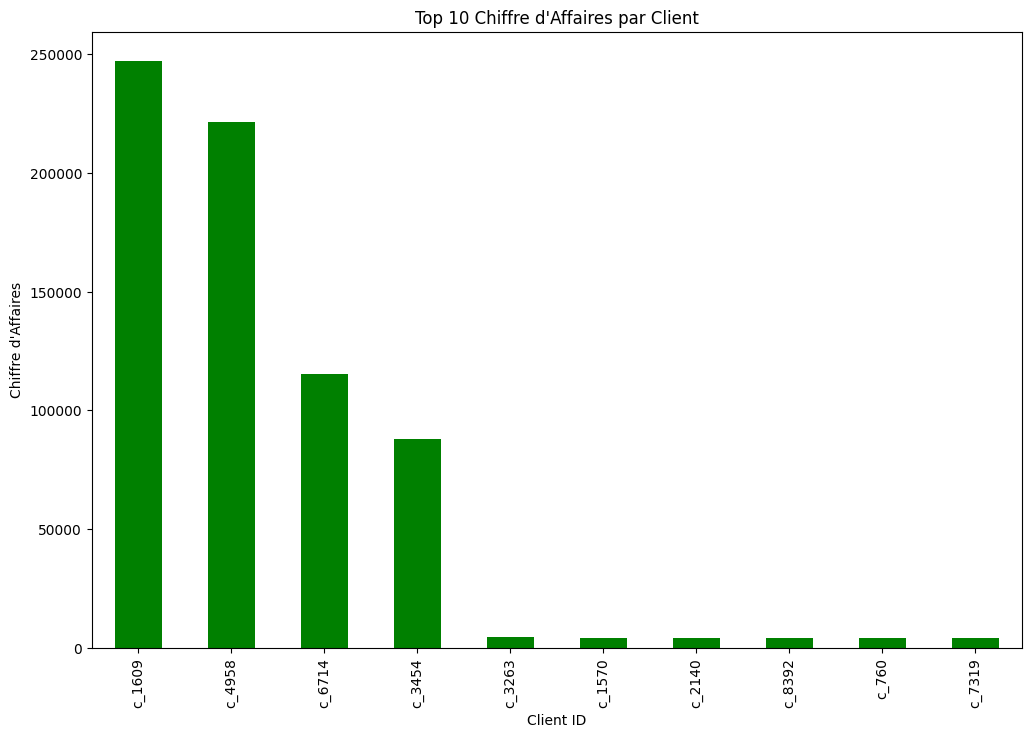

In [39]:
# Calculer le chiffre d'affaires total par client
top_clients = data.groupby('client_id')[['price']].sum().sort_values(by='price', ascending=False)
top_clients.rename(columns={'price': 'chiffre_d_affaire'}, inplace=True)

# Afficher les top 10 clients
top_10_clients = top_clients.head(10)
print("Top 10 clients par chiffre d'affaires:")
print(top_10_clients)

# Afficher les flop 10 clients
flop_10_clients = top_clients.tail(10)
print("\nFlop 10 clients par chiffre d'affaires:")
print(flop_10_clients)

# Calculer la contribution au CA total des 4 plus gros clients
top_4_clients = top_clients.head(4)
contribution_top_4 = top_4_clients['chiffre_d_affaire'].sum()
total_chiffre_affaire = top_clients['chiffre_d_affaire'].sum()
contribution_top_4_percentage = (contribution_top_4 / total_chiffre_affaire) * 100
print(f"\nContribution des 4 plus gros clients au CA total: {contribution_top_4_percentage:.2f}%")

# Calculer le CA moyen des 4 plus gros clients
ca_moyen_top_4_clients = top_4_clients['chiffre_d_affaire'].mean()
print(f"Chiffre d'affaires moyen des 4 plus gros clients: {ca_moyen_top_4_clients:.2f}")

# Calculer le CA moyen des clients hors top 4
other_clients = top_clients.iloc[4:]  # Exclure les 4 premiers
ca_moyen_autres_clients = other_clients['chiffre_d_affaire'].mean()
print(f"Chiffre d'affaires moyen des autres clients hors top 4: {ca_moyen_autres_clients:.2f}")

# Visualisation des top 10 clients
plt.figure(figsize=(12, 8))
top_10_clients['chiffre_d_affaire'].plot(kind='bar', color='green')
plt.title('Top 10 Chiffre d\'Affaires par Client')
plt.xlabel('Client ID')
plt.ylabel('Chiffre d\'Affaires')
plt.show()


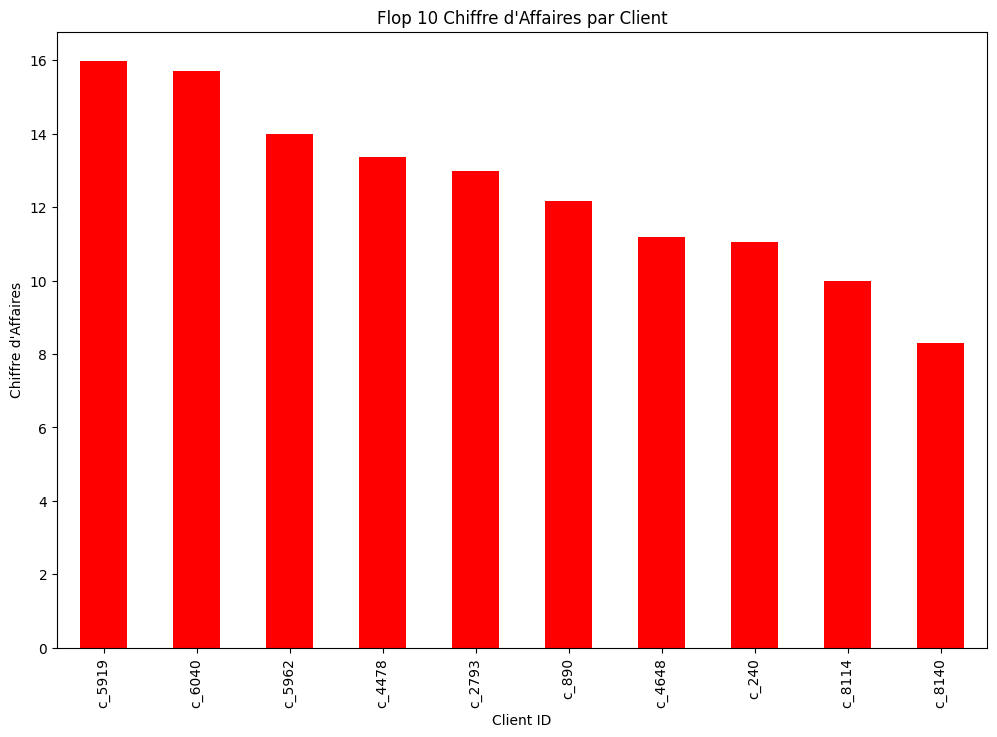

In [40]:
# Visualisation des flop 10 clients
plt.figure(figsize=(12, 8))
flop_10_clients['chiffre_d_affaire'].plot(kind='bar', color='red')
plt.title('Flop 10 Chiffre d\'Affaires par Client')
plt.xlabel('Client ID')
plt.ylabel('Chiffre d\'Affaires')
plt.show()

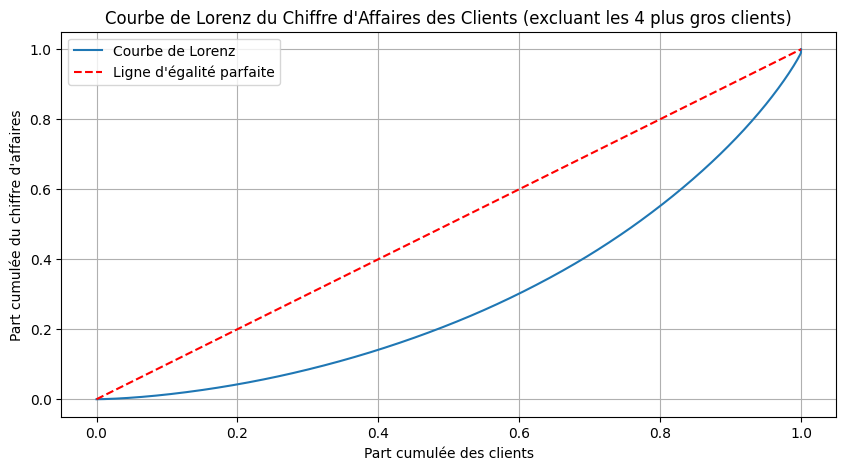

In [41]:
# Calculer le chiffre d'affaires par transaction
data['chiffre_affaires'] = data['price']  # Si chaque ligne représente un seul produit vendu

# Exclure les 4 plus gros clients spécifiques
excluded_clients = ['c_1609', 'c_4958', 'c_6714', 'C_3454']
filtered_data = data[~data['client_id'].isin(excluded_clients)]

# Calculer le chiffre d'affaires total par client sans les clients exclus
chiffre_affaires_par_client = filtered_data.groupby('client_id')['chiffre_affaires'].sum()

# Trier les valeurs pour la courbe de Lorenz
sorted_values = chiffre_affaires_par_client.sort_values().cumsum()
lorenz = sorted_values / sorted_values.iloc[-1]
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.0, 1.0, lorenz.size), lorenz, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Ligne d'égalité parfaite")
plt.title('Courbe de Lorenz du Chiffre d\'Affaires des Clients (excluant les 4 plus gros clients)')
plt.xlabel('Part cumulée des clients')
plt.ylabel('Part cumulée du chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE POUR JULIE </h1>
</div>

Table de contingence entre le genre des clients et les catégories de produits:
categ     0     1    2
sex                   
f      2847  1426  217
m      2661  1282  188


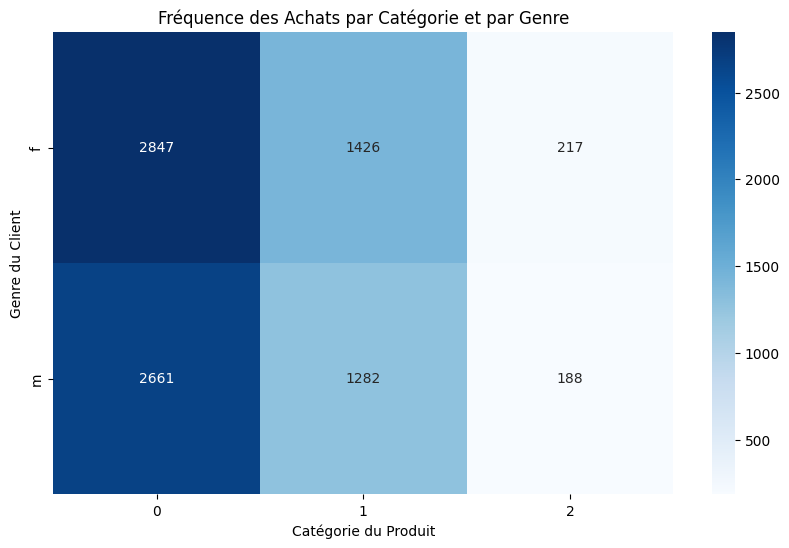

Statistique de Khi-deux : 1.07
p-value : 5.87e-01
Degrés de liberté (ddl) : 2


In [42]:
# Créer une table de contingence entre le genre des clients et les catégories des produits
contingency_table = pd.crosstab(customers['sex'], data['categ'])

# Afficher la table de contingence
print("Table de contingence entre le genre des clients et les catégories de produits:")
print(contingency_table)

# Visualisation de la table de contingence
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
plt.title('Fréquence des Achats par Catégorie et par Genre')
plt.xlabel('Catégorie du Produit')
plt.ylabel('Genre du Client')
plt.show()

# Effectuer le test de Khi-deux
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test de Khi-deux
print(f"Statistique de Khi-deux : {chi2_stat:.2f}")
print(f"p-value : {p_value:.2e}")
print(f"Degrés de liberté (ddl) : {dof}")

age
19    457698.50
20    135556.33
21    138979.69
22    133692.22
23    128017.73
        ...    
90      3824.85
91      3903.80
92      2276.64
93      2952.93
94      2116.29
Name: chiffre_affaires, Length: 76, dtype: float64


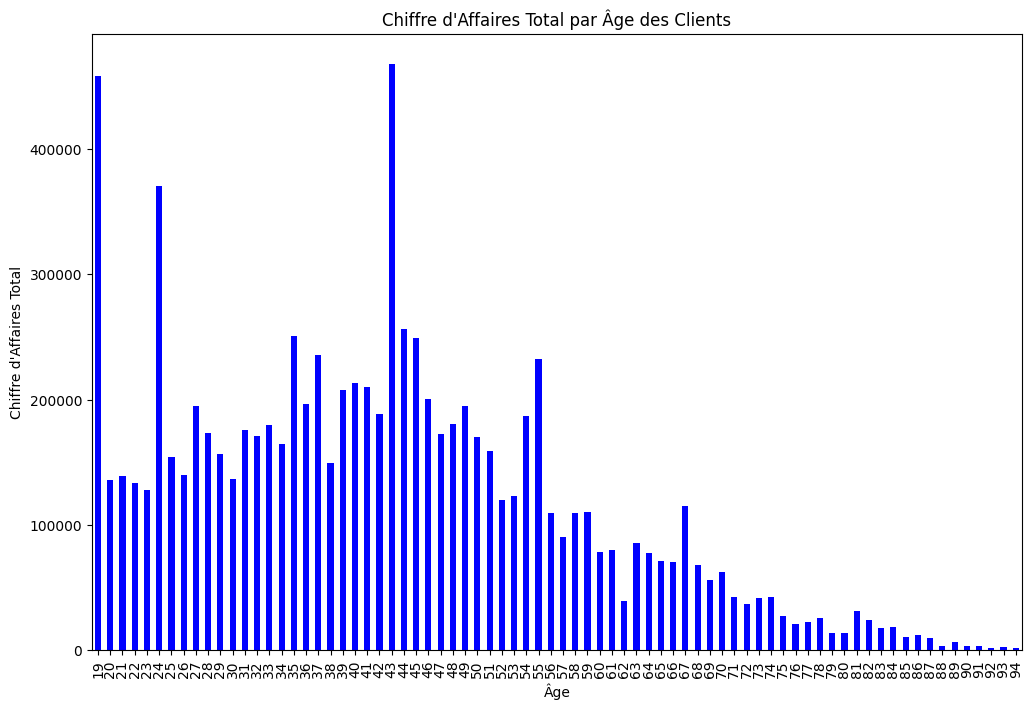

Le coefficient de corrélation de Pearson est : -0.7786544881829951
La p-value est : 1.2356092391878282e-16
Il existe une corrélation statistiquement significative entre l'âge des clients et leur chiffre d'affaires.


In [54]:
from scipy.stats import pearsonr

# Calculer l'âge des clients
current_year = 2023
customers['age'] = current_year - customers['birth']

# Fusionner les DataFrames avec des suffixes pour gérer les colonnes en double
transactions = transactions.merge(products, on='id_prod', suffixes=('', '_prod'))
data = transactions.merge(customers, on='client_id', suffixes=('', '_cust'))

# Assurer de ne garder que les colonnes nécessaires, éviter les doublons
data = data[[col for col in data.columns if not col.endswith('_prod')]]

# Calculer le chiffre d'affaires par transaction
data['chiffre_affaires'] = data['price']

# Calculer le chiffre d'affaires total par âge
chiffre_affaires_par_age = data.groupby('age')['chiffre_affaires'].sum()

# Afficher le résultat
print(chiffre_affaires_par_age)

# Visualisation du chiffre d'affaires par âge
plt.figure(figsize=(12, 8))
chiffre_affaires_par_age.plot(kind='bar', color='blue')
plt.title('Chiffre d\'Affaires Total par Âge des Clients')
plt.xlabel('Âge')
plt.ylabel('Chiffre d\'Affaires Total')
plt.show()

# Appliquer le test de Pearson
age_values = chiffre_affaires_par_age.index 
chiffre_affaires_values = chiffre_affaires_par_age.values 

correlation, p_value = pearsonr(age_values, chiffre_affaires_values)

print(f"Le coefficient de corrélation de Pearson est : {correlation}")
print(f"La p-value est : {p_value}")

if p_value < 0.05:
    print("Il existe une corrélation statistiquement significative entre l'âge des clients et leur chiffre d'affaires.")
else:
    print("Il n'y a pas de corrélation statistiquement significative entre l'âge des clients et leur chiffre d'affaires.")

Colonnes dans 'data' après fusion : Index(['id_prod', 'date', 'session_id', 'client_id', 'year_month', 'price',
       'categ', 'price_prod', 'categ_prod', 'price_prod', 'categ_prod',
       'price_prod', 'categ_prod', 'sex', 'birth', 'transactions_count',
       'age'],
      dtype='object')
age
19    26.256293
20    22.806897
21    24.262069
22    25.872000
23    25.558824
        ...    
90    29.750000
91    38.833333
92    34.750000
93    42.000000
94    46.000000
Name: transactions_count, Length: 76, dtype: float64


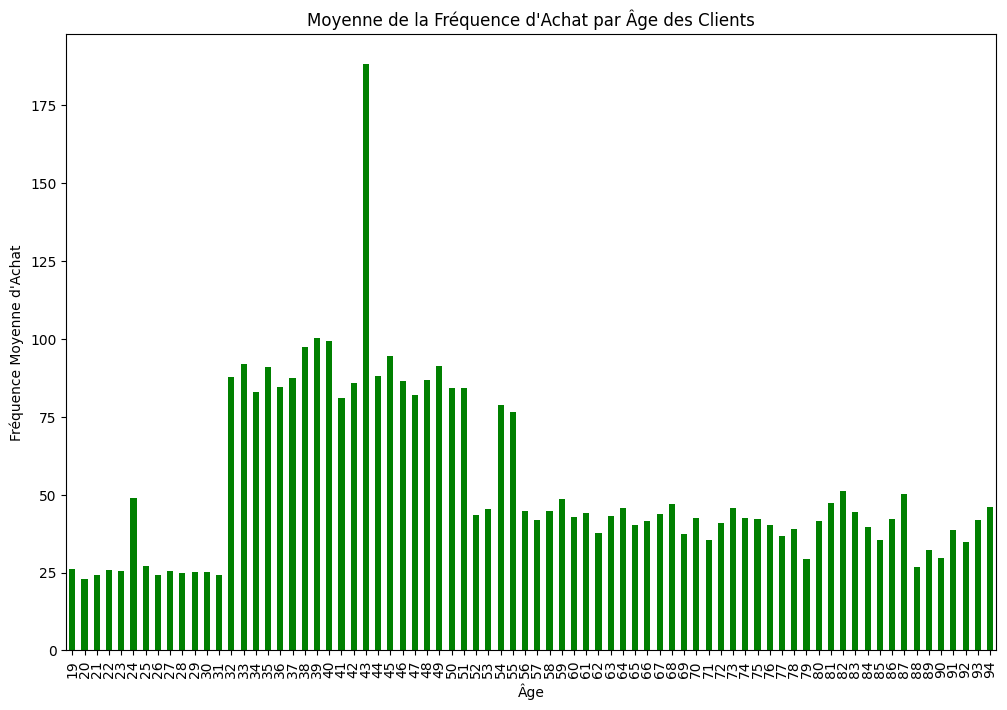

Le coefficient de corrélation de Pearson est : -0.23360928762905173
La p-value est : 0.04225484169663485
Il existe une corrélation statistiquement significative entre l'âge des clients et leur fréquence moyenne d'achat.


In [58]:
# Calculer l'âge des clients dans 'customers'
current_year = 2023
if 'birth' in customers.columns:
    customers['age'] = current_year - customers['birth']
else:
    print("Erreur : La colonne 'birth' est absente dans 'customers'.")

# Fusionner les DataFrames 'transactions' et 'customers' en utilisant 'client_id'
transactions = transactions.merge(products, on='id_prod', suffixes=('', '_prod'))
data = transactions.merge(customers, on='client_id', how='inner', suffixes=('', '_cust'))

# Vérifier si 'client_id' est présent dans le DataFrame fusionné
print("Colonnes dans 'data' après fusion :", data.columns)

# Calculer le nombre de transactions par client
transactions_per_client = data.groupby('client_id').size()

# Ajouter le nombre de transactions au DataFrame 'customers'
customers['transactions_count'] = transactions_per_client

# Grouper par âge pour calculer la moyenne de fréquence d'achat
average_purchases_by_age = customers.groupby('age')['transactions_count'].mean()

# Affichage du résultat
print(average_purchases_by_age)

# Visualisation
plt.figure(figsize=(12, 8))
average_purchases_by_age.plot(kind='bar', color='green')
plt.title('Moyenne de la Fréquence d\'Achat par Âge des Clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence Moyenne d\'Achat')
plt.show()

# Appliquer le test de Pearson
age_values = average_purchases_by_age.index
frequency_values = average_purchases_by_age.values

correlation, p_value = pearsonr(age_values, frequency_values)

print(f"Le coefficient de corrélation de Pearson est : {correlation}")
print(f"La p-value est : {p_value}")

if p_value < 0.05:
    print("Il existe une corrélation statistiquement significative entre l'âge des clients et leur fréquence moyenne d'achat.")
else:
    print("Il n'y a pas de corrélation statistiquement significative entre l'âge des clients et leur fréquence moyenne d'achat.")

C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\4045061986.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = data.groupby(['age_group', 'categ']).size().unstack().fillna(0)


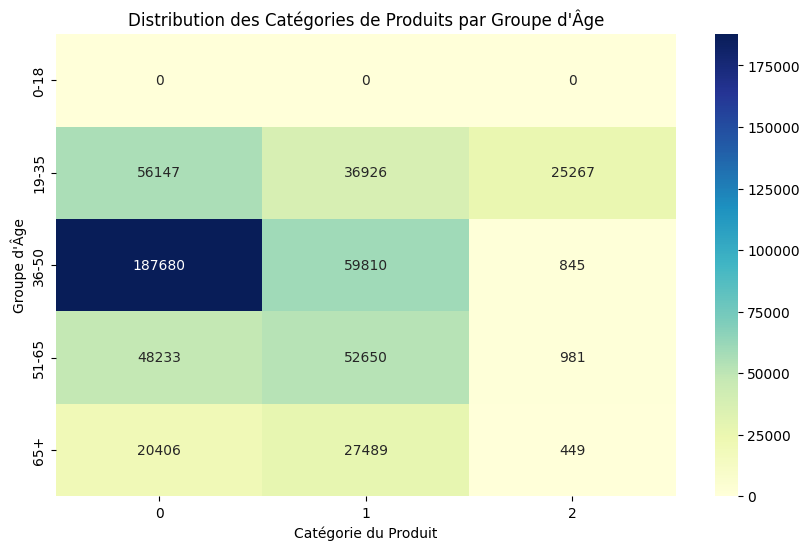

C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\4045061986.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [data[data['age_group'] == age_group][data['categ'] == category]['categ'].count() for age_group in age_category_counts.index]
C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\4045061986.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [data[data['age_group'] == age_group][data['categ'] == category]['categ'].count() for age_group in age_category_counts.index]
C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\4045061986.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [data[data['age_group'] == age_group][data['categ'] == category]['categ'].count() for age_group in age_category_counts.index]
C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\4045061986.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [data[

TypeError: object of type 'numpy.int64' has no len()

In [59]:
# # Categoriser l'âge pour une meilleure visualisation
# data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# # Grouper les données par âge et catégorie
# age_category_counts = data.groupby(['age_group', 'categ']).size().unstack().fillna(0)

# # Visualisation avec un heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(age_category_counts, annot=True, fmt="d", cmap="YlGnBu")
# plt.title('Distribution des Catégories de Livres par Groupe d\'Âge')
# plt.xlabel('Catégorie du Produit')
# plt.ylabel('Groupe d\'Âge')
# plt.show()


# Assurer que 'age_group' est correctement catégorisé
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# Grouper par groupe d'âge et catégorie pour obtenir les comptes par groupe
age_category_counts = data.groupby(['age_group', 'categ']).size().unstack().fillna(0)

# Visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(age_category_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution des Catégories de Produits par Groupe d\'Âge')
plt.xlabel('Catégorie du Produit')
plt.ylabel('Groupe d\'Âge')
plt.show()

# ANOVA pour chaque catégorie de produit
results = {}
for category in age_category_counts.columns:
    # Récupérer les valeurs de chaque groupe d'âge pour la catégorie actuelle
    groups = [data[data['age_group'] == age_group][data['categ'] == category]['categ'].count() for age_group in age_category_counts.index]
    
    # Appliquer l'ANOVA si chaque groupe a des valeurs
    if all(len(group) > 0 for group in groups):
        f_stat, p_value = f_oneway(*groups)
        results[category] = {'F-statistic': f_stat, 'p-value': p_value}

# Afficher les résultats
print("Résultats de l'ANOVA pour chaque catégorie de produit :")
for category, result in results.items():
    print(f"Catégorie {category} : F-statistic = {result['F-statistic']:.2f}, p-value = {result['p-value']:.5f}")
    if result['p-value'] < 0.05:
        print(f"  -> Il existe une différence significative entre les groupes d'âge pour la catégorie {category}.")
    else:
        print(f"  -> Aucune différence significative entre les groupes d'âge pour la catégorie {category}.")


C:\Users\jemko\AppData\Local\Temp\ipykernel_5820\1585055556.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = data.groupby(['age_group', 'categ']).size().unstack().fillna(0)


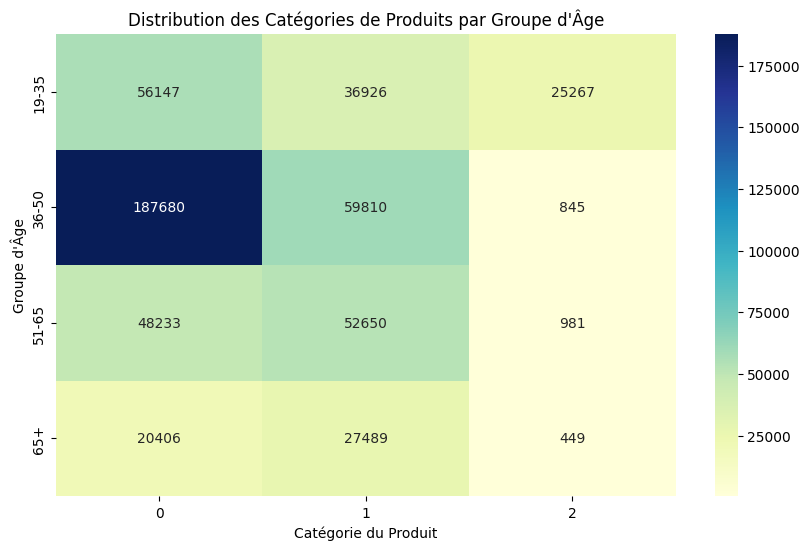


Variances pour chaque groupe d'âge et catégorie de produit :
Groupe d'âge 19-35, Catégorie 0 : Variance = 0.0
Groupe d'âge 19-35, Catégorie 1 : Variance = 0.0
Groupe d'âge 19-35, Catégorie 2 : Variance = 0.0
Groupe d'âge 36-50, Catégorie 0 : Variance = 0.0
Groupe d'âge 36-50, Catégorie 1 : Variance = 0.0
Groupe d'âge 36-50, Catégorie 2 : Variance = 0.0
Groupe d'âge 51-65, Catégorie 0 : Variance = 0.0
Groupe d'âge 51-65, Catégorie 1 : Variance = 0.0
Groupe d'âge 51-65, Catégorie 2 : Variance = 0.0
Groupe d'âge 65+, Catégorie 0 : Variance = 0.0
Groupe d'âge 65+, Catégorie 1 : Variance = 0.0
Groupe d'âge 65+, Catégorie 2 : Variance = 0.0


C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)



Résultats de l'ANOVA pour chaque catégorie de produit :
Catégorie 0 : F-statistic = nan, p-value = nan
  -> Aucune différence significative entre les groupes d'âge pour la catégorie 0.
Catégorie 1 : F-statistic = nan, p-value = nan
  -> Aucune différence significative entre les groupes d'âge pour la catégorie 1.
Catégorie 2 : F-statistic = nan, p-value = nan
  -> Aucune différence significative entre les groupes d'âge pour la catégorie 2.

Résultats du test de Kruskal-Wallis pour chaque catégorie de produit :
Erreur dans le test de Kruskal-Wallis pour la catégorie 0 : All numbers are identical in kruskal
Erreur dans le test de Kruskal-Wallis pour la catégorie 1 : All numbers are identical in kruskal
Erreur dans le test de Kruskal-Wallis pour la catégorie 2 : All numbers are identical in kruskal


In [69]:
# # Catégoriser l'âge en supprimant la tranche '0-18'
# data['age_group'] = pd.cut(data['age'], bins=[18, 35, 50, 65, 100], labels=['19-35', '36-50', '51-65', '65+'])

# # Grouper par groupe d'âge et catégorie pour obtenir les comptes par groupe
# age_category_counts = data.groupby(['age_group', 'categ'], observed=False).size().unstack().fillna(0)

# # Visualisation
# plt.figure(figsize=(10, 6))
# sns.heatmap(age_category_counts, annot=True, fmt="d", cmap="YlGnBu")
# plt.title('Distribution des Catégories de Produits par Groupe d\'Âge')
# plt.xlabel('Catégorie du Produit')
# plt.ylabel('Groupe d\'Âge')
# plt.show()

# # ANOVA pour chaque catégorie de produit
# results = {}
# for category in age_category_counts.columns:
#     # Extraire les valeurs de chaque groupe d'âge pour la catégorie actuelle
#     groups = [data[(data['age_group'] == age_group) & (data['categ'] == category)]['categ'].count() for age_group in age_category_counts.index if data[(data['age_group'] == age_group) & (data['categ'] == category)]['categ'].count() > 0]
    
#     # Vérifiez si suffisamment de groupes sont disponibles pour effectuer l'ANOVA
#     if len(groups) > 1:  # ANOVA nécessite au moins deux groupes
#         f_stat, p_value = f_oneway(*[group for group in groups])
#         results[category] = {'F-statistic': f_stat, 'p-value': p_value}

# # Afficher les résultats
# print("\nRésultats de l'ANOVA pour chaque catégorie de produit :")
# for category, result in results.items():
#     print(f"Catégorie {category} : F-statistic = {result['F-statistic']:.2f}, p-value = {result['p-value']:.5f}")
#     if result['p-value'] < 0.05:
#         print(f"  -> Il existe une différence significative entre les groupes d'âge pour la catégorie {category}.")
#     else:
#         print(f"  -> Aucune différence significative entre les groupes d'âge pour la catégorie {category}.")import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Assurer que 'age_group' est correctement catégorisé
data['age_group'] = pd.cut(data['age'], bins=[18, 35, 50, 65, 100], labels=['19-35', '36-50', '51-65', '65+'])

# Grouper par groupe d'âge et catégorie pour obtenir les comptes par groupe
age_category_counts = data.groupby(['age_group', 'categ']).size().unstack().fillna(0)

# Visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(age_category_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution des Catégories de Produits par Groupe d\'Âge')
plt.xlabel('Catégorie du Produit')
plt.ylabel('Groupe d\'Âge')
plt.show()

# Calculer la variance pour chaque groupe d'âge et catégorie de produit
print("\nVariances pour chaque groupe d'âge et catégorie de produit :")
for age_group in age_category_counts.index:
    for category in age_category_counts.columns:
        variance = data[(data['age_group'] == age_group) & (data['categ'] == category)]['categ'].var()
        print(f"Groupe d'âge {age_group}, Catégorie {category} : Variance = {variance}")

# ANOVA pour chaque catégorie de produit (si variances suffisantes)
results_anova = {}
for category in age_category_counts.columns:
    groups = [data[(data['age_group'] == age_group) & (data['categ'] == category)]['categ'].values for age_group in age_category_counts.index]
    groups = [group for group in groups if len(group) > 0]  # Supprimer les groupes vides

    if len(groups) > 1:
        try:
            f_stat, p_value = f_oneway(*groups)
            results_anova[category] = {'F-statistic': f_stat, 'p-value': p_value}
        except Exception as e:
            print(f"Erreur dans l'ANOVA pour la catégorie {category} : {e}")

# Afficher les résultats de l'ANOVA
print("\nRésultats de l'ANOVA pour chaque catégorie de produit :")
for category, result in results_anova.items():
    print(f"Catégorie {category} : F-statistic = {result['F-statistic']:.2f}, p-value = {result['p-value']:.5f}")
    if result['p-value'] < 0.05:
        print(f"  -> Il existe une différence significative entre les groupes d'âge pour la catégorie {category}.")
    else:
        print(f"  -> Aucune différence significative entre les groupes d'âge pour la catégorie {category}.")

# Alternative avec le test de Kruskal-Wallis pour les mêmes groupes
print("\nRésultats du test de Kruskal-Wallis pour chaque catégorie de produit :")
results_kruskal = {}
for category in age_category_counts.columns:
    groups = [data[(data['age_group'] == age_group) & (data['categ'] == category)]['categ'].values for age_group in age_category_counts.index]
    groups = [group for group in groups if len(group) > 0]  # Supprimer les groupes vides

    if len(groups) > 1:
        try:
            h_stat, p_value = kruskal(*groups)
            results_kruskal[category] = {'H-statistic': h_stat, 'p-value': p_value}
        except Exception as e:
            print(f"Erreur dans le test de Kruskal-Wallis pour la catégorie {category} : {e}")

# Afficher les résultats du test de Kruskal-Wallis
for category, result in results_kruskal.items():
    print(f"Catégorie {category} : H-statistic = {result['H-statistic']:.2f}, p-value = {result['p-value']:.5f}")
    if result['p-value'] < 0.05:
        print(f"  -> Il existe une différence significative entre les groupes d'âge pour la catégorie {category}.")
    else:
        print(f"  -> Aucune différence significative entre les groupes d'âge pour la catégorie {category}.")
